# TL;DR
Experiment suggests that for a random function $f: [N] \to [N]$, the number of elements in the range of an iterate $f^n$ of $f$ is closely approximated by a simple estimate for the number of elements in the range of the composition of independent random functions $f_n \circ \dots \circ f_1$.

# Simplified model
Let $f_1, \dots, f_m$ be independent random samples from $[N] \to [N]$. For $i \in [N]$, let $X_i = |Im(f_i \circ \dots \circ f_1)|$ be the number of points in the image of $f_i \circ \dots \circ f_1$. Let $X_0 = N$. Then for $i \in [N]$,  

$$\mathbb{E}[X_i \mid X_{i - 1}] = N (1 - 1/N)^{X_{i - 1}} \simeq N (1 - \exp(-X_{i - 1} / N))$$

Equivalently, letting $\Delta_i = X_i / N$ be the fraction of points of $[N]$ hit by $f_i \circ \dots \circ f_1$,

$$\mathbb{E}[\Delta_i \mid \Delta_{i - 1}] = (1 - 1/N)^{N \Delta_{i - 1}} \simeq 1 - \exp(\Delta_{i - 1})$$

Let's make the heuristic assumption that the $\Delta_i$ are perfectly concentrated, that is, $\Delta_i = \mathbb{E}[\Delta_i]$. Let's also assume that $N$ is very large, so that $(1 - 1/N)^{N}$ is essentially exactly $1/e$. Then we have the recurrence $\Delta_i = 1 - \exp(\Delta_{i - 1})$ with initial condition $\Delta_0 = 1$. Next, we use this recurrence to numerically compute $\Delta_i$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def iterate(fraction_of_range):
    return 1 - np.power(np.e, -fraction_of_range)

In [2]:
num_iterates = 1000

current_range_fraction = 1
model_range_fractions = []
for i in range(num_iterates + 1):
    model_range_fractions.append(current_range_fraction)
    current_range_fraction = iterate(current_range_fraction)

# Experiment

In [3]:
# Sample a random function f: [N] -> [N]
N = 100 * 100 # for N = 100^2
np.random.seed(0)
f = np.random.randint(0, N, size = N)

In [4]:
# Some utility functions
def image_size(f):
    return len(set(f))

def compose(f, g):
    n = len(f)
    result = np.zeros(n, dtype='int64')
    for i in range(n):
        result[i] = f[g[i]]
    return result

In [5]:
# We're interested in how quickly |Im f^n| decays as a function of n. 
num_iterates = 1000
image_sizes = []
iterates = []
current_f = f
for i in range(num_iterates):
    iterates.append(current_f)
    image_sizes.append(image_size(current_f))
    current_f = compose(f, current_f)
image_sizes = np.asarray([N] + image_sizes)
experimental_range_fractions = image_sizes / N
fixed_point_index = np.argmax(np.diff(np.asarray(experimental_range_fractions)) == 0)

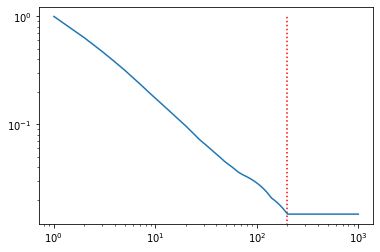

In [6]:
logscale_indices = np.asarray(range(num_iterates + 1)) + 1
plt.xscale("log")
plt.yscale("log")
plt.plot(logscale_indices, experimental_range_fractions)
plt.vlines(fixed_point_index + 1, 0, 1, color="red", linestyle="dotted")

# Comparison

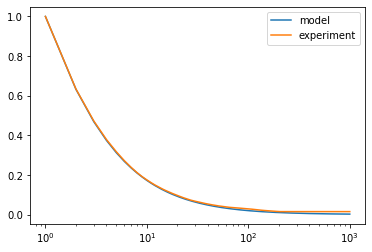

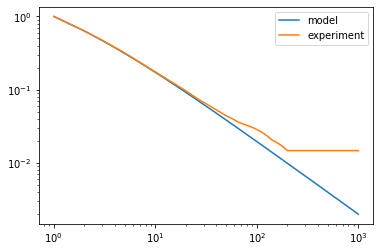

In [19]:
plt.xscale("log")
plt.plot(logscale_indices, model_range_fractions, label="model")
# let's compare with experiment!
plt.plot(logscale_indices, experimental_range_fractions, label="experiment")
plt.legend()
plt.show()
plt.xscale("log")
plt.yscale("log")
plt.plot(logscale_indices, model_range_fractions, label="model")
# let's compare with experiment!
plt.plot(logscale_indices, experimental_range_fractions, label="experiment")
plt.legend()

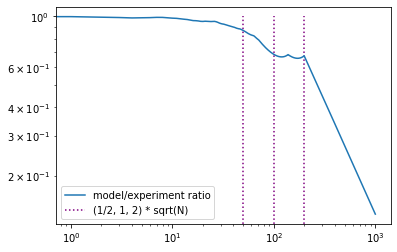

In [16]:
plt.xscale("log")
plt.yscale("log")
plt.plot(np.asarray(model_range_fractions)/np.asarray(experimental_range_fractions), label="model/experiment ratio")
plt.vlines([np.sqrt(N) / 2, np.sqrt(N), 2 * np.sqrt(N)], 0, 1, label="(1/2, 1, 2) * sqrt(N)", 
           color="purple", linestyle="dotted")
plt.legend()

Notice that the approximation is very good for $i \ll \sqrt{N}$, starts to break down around $i = \sqrt{N}$, and only fails completely past the point at which $|Im(f^n)|$ no longer decreases with $n$. So this is likely a very reasonable model for $i < \log{N}$. However, although the model is very simple, I don't have a simple closed form for the model $\Delta_i$'s. 